In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import io, color, feature, transform
from matplotlib.patches import Circle

In [2]:
# Load and preprocess the image
image = io.imread('coins.jpg')
gray_image = color.rgb2gray(image)

(-0.5, 999.5, 462.5, -0.5)

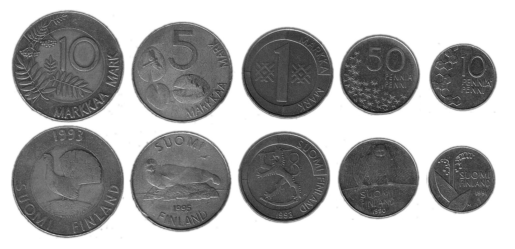

In [5]:
plt.imshow(gray_image, cmap='gray')
plt.axis('off')

In [6]:
diamters_mm = [27.25, 24.50, 22.25, 19.70, 16.30]
resolution_mm_per_pixel = 0.12
radii_pixels = [int(d / (2 * resolution_mm_per_pixel)) for d in diamters_mm]
radii_pixels

[113, 102, 92, 82, 67]

(-0.5, 999.5, 462.5, -0.5)

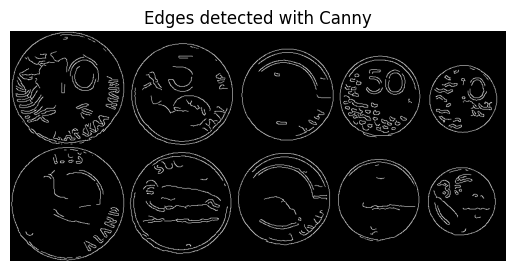

In [7]:
# Apply Canny edge detector 
edges = feature.canny(gray_image, sigma=2)
plt.imshow(edges, cmap='gray')
plt.title('Edges detected with Canny')
plt.axis('off')

In [10]:
# Hough transform for circle detection

hough_results = transform.hough_circle(edges, radii_pixels)

In [11]:
# Extract peaks for each radius 
from skimage.draw import circle_perimeter
accums, cx, cy, radii = transform.hough_circle_peaks(hough_results, radii_pixels, total_num_peaks=10, normalize=True)

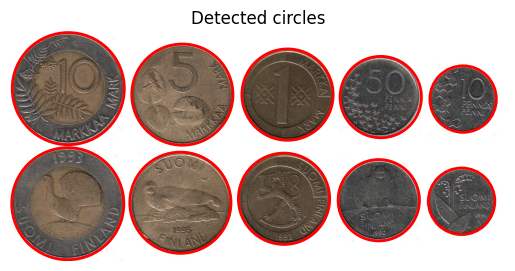

In [13]:
# Overlay detected circles on the original image
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')
for center_y, center_x, radius in zip(cy, cx, radii):
    circle = Circle((center_x, center_y), radius, color='r', fill=False, linewidth=2)
    ax.add_patch(circle)
plt.title('Detected circles')
plt.axis('off')
plt.show()